# Cheat Sheet

https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Univariate analysis


- Where are the data points located, and how far do they spread? What are typical, as well as minimal and maximal, values?

- How are the points distributed? Are they spread out evenly or do they cluster in certain areas?

- How many points are there? Is this a large data set or a relatively small one?

- Is the distribution symmetric or asymmetric? In other words, is the tail of the distribution much larger on one side than on the other?

- Are the tails of the distribution relatively heavy (i.e., do many data points lie far away from the central group of points), or are most of the points—with the possible exception of individual outliers—confined to a restricted region?

- If there are clusters, how many are there? Is there only one, or are there several? Approximately where are the clusters located, and how large are they—both in terms of spread and in terms of the number of data points belonging to each cluster?

- Are the clusters possibly superimposed on some form of unstructured background, or does the entire data set consist only of the clustered data points?

- Does the data set contain any significant outliers—that is, data points that seem to be different from all the others?

- And lastly, are there any other unusual or significant features in the data set—gaps, sharp cutoffs, unusual values, anything at all that we can observe?

In [5]:
nba = pd.read_csv('data/nba.csv')
nba.head(1)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0


https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#89dd

In [23]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     457
unique      5
top        SG
freq      102
Name: Position, dtype: object
mode:  0    SG
dtype: object
SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64


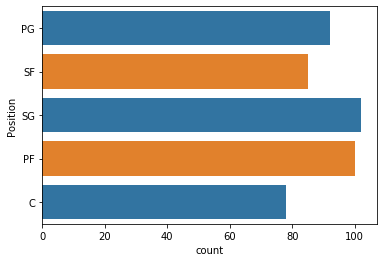

In [24]:
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(nba, y = 'Position', palette=c_palette)

## Bivariate Analysis

count                      457
unique                      30
top       New Orleans Pelicans
freq                        19
Name: Team, dtype: object
mode:  0    New Orleans Pelicans
dtype: object
New Orleans Pelicans      19
Memphis Grizzlies         18
Milwaukee Bucks           16
New York Knicks           16
Los Angeles Lakers        15
Phoenix Suns              15
Utah Jazz                 15
Washington Wizards        15
Philadelphia 76ers        15
Miami Heat                15
Toronto Raptors           15
Houston Rockets           15
Los Angeles Clippers      15
Brooklyn Nets             15
Boston Celtics            15
Oklahoma City Thunder     15
Indiana Pacers            15
Portland Trail Blazers    15
Cleveland Cavaliers       15
Detroit Pistons           15
San Antonio Spurs         15
Golden State Warriors     15
Sacramento Kings          15
Atlanta Hawks             15
Charlotte Hornets         15
Denver Nuggets            15
Dallas Mavericks          15
Chicago Bulls       

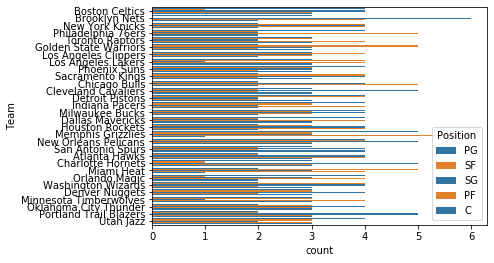

In [25]:

categorical_summarized(nba, y = 'Team', hue='Position', palette=c_palette)

In [26]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64
mode:  0    947276.0
dtype: float64


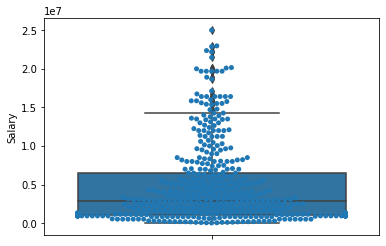

In [27]:
quantitative_summarized(dataframe= nba, y = 'Salary', palette=c_palette, verbose=False, swarm=True)

# Bivariate Analysis

count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64
mode:  0    947276.0
dtype: float64


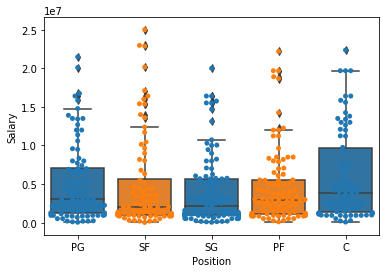

In [28]:
quantitative_summarized(dataframe= nba, y = 'Salary', x = 'Position', palette=c_palette, verbose=False, swarm=True)

# Multivariate Analysis

count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64
mode:  0    947276.0
dtype: float64


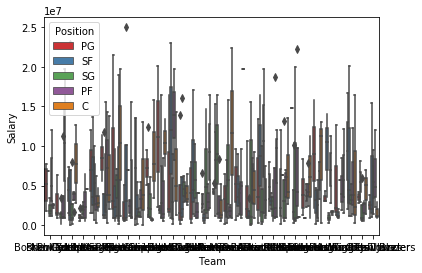

In [29]:
quantitative_summarized(dataframe= nba, y = 'Salary', x = 'Team', hue = 'Position', verbose=False, swarm=False)